<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *5*: *Naive Bayes Classification***

###**Tenggat Waktu: 8 November 2021, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: F_Lab5_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **8 November 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


#### **Pertanyataan Integritas**

In [ ]:
# Isi dengan data diri Anda
NAMA = ""
KELAS = ""
NPM = ""

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

# A. Pengenalan Naive Bayes

Tugas Anda kali ini adalah mengimplementasi Naive Bayes Classifier dan melakukan pengukuran kinerja model. Mari kita sekilas mempelajari tentang Naive Bayes Classifier terlebih dahulu.




 Algoritma Naive Bayes memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga dikenal sebagai Teorema Bayes. Ciri utama dari Naive Bayes Classifier ini adalah asumsi yg sangat kuat akan independensi dari masing-masing kondisi/kejadian.

Bayangkan bahwa Anda ingin membentuk classifier yang memprediksi golongan darah seseorang (A? B? AB? atau O?) berdasarkan sifat karakter seseorang (arogan? perhatian? teliti? cerdas? sabar?). Anda akan membentuk sebuah kuesioner kepribadian dan memberikan kuesioner tersebut ke orang-orang. Kuesioner tersebut dikumpulkan untuk menghasilkan sebuah dataset. Anggaplah
bahwa Kak Lulu mengatakan kepada Anda bahwa dia adalah orang yang perhatian, cerdas, teliti, dan sabar. Bisakah Anda memanfaatkan informasi dari kuesioner yang Anda kumpulkan untuk memprediksi golongan darah Kak Lulu?.

Salah satu cara untuk memprediksi golongan darah Kak Lulu adalah dengan menggunakan teorema Naive Bayes. Jika saya ingin menghitung peluang golongan darah Kak Lulu adalah O karena diketahui Kak Lulu adalah orang yang perhatian, rumus probabilitas yang dapat digunakan adalah Bayes Rule yang ditunjukkan di bawah ini.





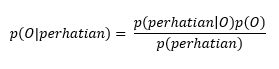

Ketiga nilai tersebut bisa dihitung berdasarkan data yang dikumpulkan dari kuesioner. Umumnya, kita
tidak hanya menghitung P(O | perhatian), tetapi juga menghitung P(A | perhatian) , P(B | perhatian), dan P(AB | perhatian). Setelah kita hitung empat-empatnya, golongan darah yang peluangnya paling besar itulah yang kita
prediksi sebagai golongan darah Kak Lulu.

Namun, peneliti biasanya ingin rumus yang jumlah variabelnya sedikit mungkin. Kalau kita pikirkan lebih lanjut, penyebut dari p(O|perhatian) dibagi oleh p(perhatian). Sama halnya, p(A | perhatian), p(B | perhatian), dan P(AB | perhatian) juga dibagi dengan p(perhatian) seperti yang dapat dilihat pada rumus-rumus di bawah ini.


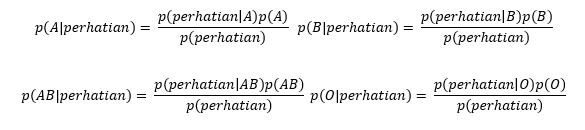

Jika keempat variabel memiliki pembagi yang sama, bukankah ini artinya urutan nilai P(A|perhatian),
P(B|perhatian) , P(AB|perhatian), dan P(O|perhatian) dari yang terbesar sampai yang terkecil tidak akan berubah meskipun penyebutnya (p(perhatian)) dicoret? Sehingga kita tidak perlu untuk menghitung nilai dari p(perhatian).

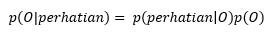

Perhatikan rumus di atas (rumus ketika pembagian dengan P(perhatian) dihilangkan).
Nilai ini hanya menghitung probabilitas mempunyai golongan darah O bila hanya faktor bahwa Kak Lulu itu perhatian diperhitungkan. Bagaimana faktor seperti cerdas, sabar, teliti, atau sifat
seseorang lainnya? Secara matematika, kita bisa menggunakan rumus chain rule untuk
memperhitungkan faktor lain tersebut seperti yang diperlihatkan pada rumus di bawah ini.


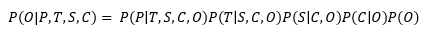

Keterangan : 
*   T: teliti
*   C: cerdas
*   S: Sabar
*   P: perhatian
*   O: golongan darah O






Untungnya, dalam konteks Naive Bayes Classifier, kita dapat mengasumsikan bahwa faktor seperti
teliti, cerdas, dan sebagainya adalah faktor independen yang tidak terpengaruh oleh variabel yang
lain. Artinya, rumus di atas bisa disimplifikasi sebagai berikut:

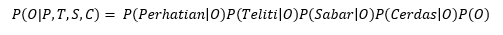

# B. Naive Bayes dalam Scikit Learn

Scikit-learn menyediakan beberapa variasi model naive bayes yang dapat digunakan, antara lain


| Nama Model | Nama Modul | 
| ----------- | --------- |
| Gaussian Naive Bayes | `sklearn.naive_bayes.GaussianNB` | 
| Multinomial Naive Bayes | `sklearn.naive_bayes.MultinomialNB` |
| Complement Naive Bayes | `sklearn.naive_bayes.ComplementNB` |
| Bernoulli Naive Bayes | `sklearn.naive_bayes.BernoulliNB` |
| Categorical Naive Bayes | `sklearn.naive_bayes.CategoricalNB` |

Adapun keguanaan masing-masing model antara lain:
- Gaussian Naive Bayes,
Model ini cocok digunakan untuk  data numerik yang mengikuti distribusi gausian dan kontinu. 

- Multinomial Naive Bayes,
Asumsi data yang digunakan memiliki distribusi multinomial sederhana. Distribusi multinomial menggambarkan probabilitas dari jumlah data pada sejumlah kategori sehingga model naive bayes ini cocok digunakan pada fitur yang merepresentasikan jumlah maupun laju pertambahan. Contohnya yaitu pada klasifikasi text dimana fitur-fitur yang ada berkaitan dengan frekuensi kata pada dokumen yang ingin diklasifikasikan.

- Complement,
Complement naive bayes mirip seperti multinomial naive bayes. Model ini ada karena model multinomial naive bayes tidak memiliki performa yang baik untuk dataset yang imbalanced dimana distribusi data tidak uniform. Akibatnya model tersebut data dengan mudah overfiting mengikuti data yang jumlahnya jauh lebih banyak. Model complement naive bayes ini cocok digunakan untuk dataset yang imbalanced. 
https://towardsdatascience.com/comparing-a-variety-of-naive-bayes-classification-algorithms-fc5fa298379e

- Bernoulli Naive Bayes,
Bernouli mirip seperti multinomial namun data memiliki bentuk yang diskret dan terdistribusi dalam bentuk binary misalnya pada data gender, binary hot encoding, dll. https://iq.opengenus.org/bernoulli-naive-bayes/

- Categorical Naive Bayes,
Model naive bayes untuk tipe data yang nilainya terdistribusi secara kategorikal. Jika data-data yang dimiliki bersifat kontinu maka harus ditransformasikan dalam bentuk diskret terlebih dahulu untuk menggunakan model ini. Misalnya yaitu data warna mata, ras, golongan darah, dll.
https://inblog.in/Categorical-Naive-Bayes-Classifier-implementation-in-Python-dAVqLWkf7E


Selengkapnya dapat dilihat pada dokumentais modul [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html).

## Hands On

Dataset didalam example.csv berisi tentang informasi dilakukannya operasi caesar atau tidak dari 80 ibu hamil dengan karakteristik masalah persalinan yang penting di bidang medis.

Informasi dataset:

`Age` = Umur

`Delivery No` = Status (Tepat waktu, prematur, terlambat)

`Blood of Pressure` = Tekanan Darah (rendah, normal, tinggi)

`Heart Problem` = Memiliki masalah penyakit jantung (apt, inept)

`Cesarian` = Dilakukan operasi caesar (ya, tidak)

Sumber dataset : https://www.kaggle.com/amir75/caesarean-section-classification


## Import data

In [ ]:
# import library dan data
import pandas as pd
import numpy as np
caesarian = pd.read_csv("example.csv")
caesarian.head()

In [ ]:
#Mencari jumlah nilai unik pada kolom yang bertipe kategorik 

for col in caesarian.select_dtypes(include=object).columns:
    print('No. of unique values in column '+col+':')
    print(caesarian[col].value_counts(),'\n')

## Independent Variables & Dependent Variable
Pada langkah ini, kita akan menentukan variabel yang menjadi variabel independen dan dependen. Variabel caesarian menjadi variabel dependen dan variabel lainnya menjadi variabel independen.

Kita akan melakukan one hot encoding untuk mengubah dataset kita menjadi tipe data integer agar dapat digunakan didalam model.

In [ ]:
# Proses Encoding menggunakan One-Hot encoding

df_dummy = pd.get_dummies(caesarian,drop_first=True)
df_dummy.head()

In [ ]:
# Variabel independen
x = df_dummy.drop(["Caesarian_Yes"], axis = 1)
x.head()

# Variabel dependen
y = df_dummy["Caesarian_Yes"]
y.head()

## Classification
Klasifikasi menggunakan naive bayes terdapat dalam package sklearn. Dalam pengklasifikasian ini dibutuhkan data testing dan data training. Kita akan mengambil 20% dari data yang ada sebagai test.  Berikut adalah kode program untuk menentukan data testing dan data training.

In [ ]:
# Melakukan splitting terhadap data train dan test (0.2 test_size)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

Setelah itu kita akan mengaktifkan/memanggil/membuat fungsi klasifikasi naive bayes dan memasukkan data training pada fungsi klasifikasi gaussian naive bayes.

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(x_train, y_train)

Langkah selanjutnya yang akan kita lakukan adalah menentukan hasil prediksi dari x_test.

In [ ]:
# Prediksi data test
y_pred = nbtrain.predict(x_test)
y_pred

Output kode program y_pred adalah hasil prediksi operasi caesar. Kemudian, hasil tersebut akan kita bandingkan dengan data aktualnya, yaitu y_test dengan menggunakan kode program berikut ini.

In [ ]:
# Array data test
np.array(y_test)

## Confusion Matrix
Confusion matrix merupakan matriks yang berisi ketepatan prediksi. Berikut adalah cara menampilkan confusion matrix dari data caesarian.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Keluaran confusion matrix di atas tentu memudahkan dalam membaca ketepatan prediksi, tetapi kita akan merapikan confusion matrix tersebut agar kita jauh lebih mudah untuk membacanya.

In [ ]:
# Merapikan hasil confusion matrix
y_actual = pd.Series(np.array(y_test), name = "actual")
y_pred = pd.Series(np.array(y_pred), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
df_confusion

Pada output, kita dapat mengetahui bahwa terdapat 6 ibu hamil yang diprediksi melakukan persalinan normal dan pada keadaan aktualnya memang melakukan persalinan normal. Sementara itu, jumlah ibu hamil yang diprediksi melakukan persalinan normal tetapi pada keadaan aktualnya melahirkan secara caesar juga sebanyak 5. Kemudian, terdapat 2 ibu hamil yang diprediksi melahirkan secara caesar dan pada keadaan aktualnya memang melahirkan secara caesar. Sementara itu, terdapat 3 ibu hamil yang diprediksi melahirkan secara caesar tetapi pada keadaan aktualnya melahirkan secara normal.

## Classification Report
Langkah terakhir yang akan kita lakukan adalah menampilkan hasil evaluasi dari klasifikasi dengan metode naive bayes ini.

In [ ]:
# Membuat classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# C. Tugas Lab

Pada sesi lab kali ini kalian diminta untuk menerapkan naive bayes classification pada dataset `drug.csv`. 


## Informasi fitur-fitur pada dataset drug.csv: 
`Age` : Age of the Patient

`Sex` : Gender of the patients

`BP` : Blood Pressure Levels

`Cholestrol` : Cholestrol Levels

`Na_to_K` : Sodium to potassium Ration in

`Drug` : Drug Type

Deskripsi Dataset (jumlah atribut, jumlah data, jumlah data tak valid, dan eksplorasi sederhana)

In [ ]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import sys
%matplotlib inline

In [ ]:
# import dataset
drug = pd.read_csv("./drug.csv")
drug.head()

In [ ]:
# Melihat informasi data tiap kolom dataset
drug.info()

In [ ]:
# EDA
import seaborn as sns
sns.pairplot(drug,hue ='Drug')

In [ ]:
# Preprocessing menggunakan LabelEncoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
drug['Sex'] = label.fit_transform(drug['Sex'])
drug['BP'] = label.fit_transform(drug['BP'])
drug['Cholesterol'] = label.fit_transform(drug['Cholesterol'])

Berikut adalah Hal-hal yang harus kalian kerjakan pada lab kali ini.

1. [30] Model naive bayes apa yang cocok digunakan untuk dataset tersebut? dan kenapa Anda memilih model naive bayes tersebut.

> Tulis jawaban Anda di sini

Melihat dari distribusi dataset tersebut, model yang cocok digunakan yaitu model gausian naive bayes.

2.  [40] Pisahkan dataset menjadi feature dan target class ke dalam masing-masing variabel `X` dan `y`. Bagi dataset menjadi 80% data *training* dan 20% data *testing*. Latihlah (train) menggunakan algoritma Naive Bayes yang kalian pilih pada soal nomor 1 menggunakan data training dan gunakan algoritma yang telah dilatih untuk membuat prediksi pada data testing.

In [ ]:
# Tuliskan Jawaban Anda disini

3. [20] Lakukan evaluasi dari model naive bayes yang sudah kalian buat!

In [ ]:
# Tuliskan Jawab Anda disini

4. [10] Jika kita pelajari lebih lanjut, masing-masing algoritma Naive Bayes sebenarnya dibuat untuk tipe data tertentu, seperti Gaussian untuk data numerik, Bernoulli untuk data dengan distribusi biner, dan lain-lain. Apakah kita bisa menggunakan hanya satu algoritma Naive Bayes tertentu untuk kasus mixed-data (data dengan tipe fitur yang bercampur antara numerik dan kategorik)? Ceritakan ide atau strategi Anda dalam menangani kasus mixed-data dengan menggunakan Naive Bayes!   
**Catatan:** Jawaban tidak harus dengan implementasi. Soal ini tidak mempengaruhi jawaban pada nomor-nomor sebelumnya (tidak perlu diterapkan pada jawaban sebelumnya)

> Tulis jawaban Anda di sini